## Импорт библиотек и чтение файла

### Цель работы
Изучение связи между признаками двумерного набора данных,
визуализация данных.

### Задание
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными ветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('salary2.csv', sep = ';')

### Описание предметной области
**Вариант 5**\
Датасет ```salary2.csv``` содержит информацию о заработных платах, типах занятости персонала, компаниях:
* ```work_year``` — год выплаты заработной платы (целое число);
* ```employment_type``` — тип работы (PT - Part-time, FT - Full-time, FL-Freelance);
* ```job_title``` — должность;
* ```salary``` — зарплата за год (целое число);
* ```salary_in_usd``` — зарплата в долларах (целое число);
* ```employee_residence``` — страна проживания;
* ```company_location``` — страна главного офиса;
* ```company_size``` — Среднее кол-во людей в компании (S - менее 50 сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250 сотрудников (крупная))
* ```exp_all``` — общий опыт на работе;
* ```exp``` — опыт на последней работе.
  
Такой набор признаков подходит для анализа предприятий.

## 1. Обзор данных

In [27]:
df.head(20)

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4
5,2020.0,FT,Data Scientist,3000000.0,40481.0,IN,IN,L,53,1
6,2020.0,FT,Data Scientist,35000.0,39916.0,FR,FR,M,6,2
7,2020.0,FT,Data Analyst,85000.0,85000.0,US,US,L,15,2
8,2020.0,FT,Data Analyst,8000.0,8000.0,PK,PK,Large,1,4
9,2020.0,FT,Data Engineer,4450000.0,41689.0,JP,JP,S,50,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB


---
В наборе данных 401 строка и 10 столбцов; \
Типы данных: ```object``` (строковый), ```float64```, ```int64```; \
Почти все столбцы имеют 401 непустое значение кроме: ```salary``` - 398 непустых значений, то есть 3 записи с пропусками.

Вывод: данные в целом чистые и понятные, кроме ```salary```; нужно будет проверить, почему ```work_year``` имеет тип ```float64``` - логичнее, чтобы это был ```int```, ведь год - целое число. Можно приступать к анализу, очистке и визуализации данных.

---

In [29]:
df.describe()

,work_year,salary,salary_in_usd,exp_all,exp
count,401.000000,3.980000e+02,401.000000,401.000000,401.000000
mean,2021.528678,2.888336e+05,105895.017456,17.197007,4.486284
std,0.678086,1.677081e+06,58183.664171,11.133445,2.027421
min,2020.000000,4.000000e+03,2859.000000,0.000000,-1.000000
25%,2021.000000,6.700000e+04,65013.000000,10.000000,3.000000
50%,2022.000000,1.091400e+05,100000.000000,15.000000,4.000000
75%,2022.000000,1.500000e+05,140000.000000,22.000000,6.000000
max,2022.000000,3.040000e+07,412000.000000,81.000000,10.000000


- ```count``` показывает количество заполненных строк в каждом столбце
- ```mean``` показывает среднее значение от всех столбцов
- ```std``` стандартное отклонение
- ```min``` минимальные зачения
- ```25%``` — соответственное значение процентиля
- ```50%``` — соответственное значение процентиля
- ```75%``` — соответственное значение процентиля
- ```max``` — максимальное значение столбца

По числовым признакам датасета можно сделать следующие выводы:
1. ```work_year``` — данные охватывают 2020 - 2022 годы, то есть три года наблюдений;
2. ```salary``` — есть 3 пропуска, очень большое отклонение и максимум, то есть подозрительно большие зарплаты, среднее сильно искажено из-за таких выбросов, лучше смотреть медиану, как более надёжную оценку;
3. ```salary_in_usd``` — здесь зарплаты переведены в доллары, поэтому распределение реалистичное, среднее и медиана близки, то есть распределение относительно сбалансированное (без сильных перекосов), но всё равно есть высокие зарплаты (до 412 000 USD) — это, вероятно, руководители или специалисты высокого уровня;
4. ```exp_all``` — в среднем сотрудники имеют 15–17 лет опыта, есть аномалия — 81 год опыта, что невозможно (вероятно, ошибка ввода), также есть 0 лет опыта, то есть новички;
5. ```exp``` — в среднем люди работают 4–5 лет на текущем месте, верхняя граница 10 лет выглядит правдоподобно, есть некорректное значение -1, то есть ошибка данных (опыт не может быть отрицательным).


## 2. Проверка и заполнение пропусков

In [30]:
print(df.isna().sum())

work_year             0
employment_type       0
job_title             0
salary                3
salary_in_usd         0
employee_residence    0
company_location      0
company_size          0
exp_all               0
exp                   0
dtype: int64


---

Пропуски есть только в столбце salary — 3 значения из 401. Все остальные поля заполнены полностью.\
Пропущенные значения некоторых зарплат будут восстановлены, используя медианный курс для каждой страны. 

---

In [31]:
# создание нового слолбца, где вычисляется курс валюты для каждой страны
df["currency_rate"] = df["salary"] / df["salary_in_usd"]

# группировка по стране проживания (для каждой страны свой медианный курс валюты)
median_rates = df.groupby("employee_residence")["currency_rate"].median()

# функция, которая будет применяться к каждой строке
def add_salary(row):
    # проверка: если salary пропущена (NaN), нужно её заполнить
    if pd.isna(row["salary"]):
        # берём медианный курс валюты для страны, где живёт сотрудник (если такой страны нет - возвращается NaN)
        rate = median_rates.get(row["employee_residence"], np.nan)
        # проверка: найден ли курс
        if not pd.isna(rate):
            # пересчёт зарплаты в местной валюте
            return row["salary_in_usd"] * rate
    # если зарплата не была пропущена — возвращается исходное значение
    return row["salary"]

# применяем функцию (axis=1 означает, что функция применяется построчно)
df["salary"] = df.apply(add_salary, axis=1)

print(df.isna().sum(), '\n')

work_year             0
employment_type       0
job_title             0
salary                0
salary_in_usd         0
employee_residence    0
company_location      0
company_size          0
exp_all               0
exp                   0
currency_rate         3
dtype: int64 



## 3. Поиск явных и неявных дубликатов

### Неявные дубликаты

In [32]:
# уникальные значения в 'employment_type'
print(df['employment_type'].unique(), "\n")
# уникальные значения в 'job_title'
print(df['job_title'].unique(), "\n")
# уникальные значения в 'employee_residence'
print(df['employee_residence'].unique(), "\n")
# уникальные значения в 'company_location'
print(df['company_location'].unique(), "\n")
# уникальные значения в 'company_size'
print(df['company_size'].unique())

['FT' 'PT' 'FL'] 

['Data SCIENTIST' 'Product Data Analyst' 'Data Analyst' 'Data Scientist'
 'Data Engineer' 'Machine Learning Manager' 'Data Analytics Engineer'
 'Data Science Engineer' 'Machine Learning Developer'
 'Data Analytics Manager' 'Head of Data Science'
 'Head of Machine Learning' 'NLP Engineer' 'Data Analytics Lead'
 'DataScientist' 'Data AnalyticsManager'] 

['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH'] 

['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH'] 

['L' 'S' 'M' 'Large']


---

**Неявные дубликаты найдены в столбце ```job_title```:**\
```Data SCIENTIST```, ```Data Scientist```, ```DataScientist``` - одно и то же (разный регистр и отсутствие пробела);\
```Data AnalyticsManager``` и ```Data Analytics Manager``` - ошибка с отсутствующим пробелом.\
**Неявные дубликаты найдены в столбце ```company_size```:**\
```L``` и ```Large``` обозначают одно и то же — крупную компанию.

---

In [33]:
# приведение регистра и пробелов
df["job_title"] = df["job_title"].str.lower().str.strip()

# исправление конкретных неявных дубликатов
df["job_title"] = df["job_title"].replace({
    "data scientist": "data scientist",
    "data scientist": "data scientist",
    "data scientist": "data scientist",
    "datascientist": "data scientist",
    "data scientist": "data scientist",
    "data analyticsmanager": "data analytics manager"
})

# исправление размера компании
df["company_size"] = df["company_size"].replace({
    "Large": "L"
})

# приведение кодов к верхнему регистру
for col in ["employment_type", "employee_residence", "company_location"]:
    df[col] = df[col].str.upper()

# проверка:
# уникальные значения в 'employment_type'
print(df['employment_type'].unique(), "\n")
# уникальные значения в 'job_title'
print(df['job_title'].unique(), "\n")
# уникальные значения в 'employee_residence'
print(df['employee_residence'].unique(), "\n")
# уникальные значения в 'company_location'
print(df['company_location'].unique(), "\n")
# уникальные значения в 'company_size'
print(df['company_size'].unique())

['FT' 'PT' 'FL'] 

['data scientist' 'product data analyst' 'data analyst' 'data engineer'
 'machine learning manager' 'data analytics engineer'
 'data science engineer' 'machine learning developer'
 'data analytics manager' 'head of data science'
 'head of machine learning' 'nlp engineer' 'data analytics lead'] 

['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH'] 

['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH'] 

['L' 'S' 'M']


---

Все неявные дубликаты устранены.

---

### Явные дубликаты

In [34]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print(f'Количество строк в датафрейме до удаления явных дубликатов: {df.shape[0]}')

Количество дубликатов: 0
Количество строк в датафрейме до удаления явных дубликатов: 401


## 4. Устранение ошибочных данных "exp_all" и "exp"

---

Есть несколько ошибок:
1. Отрицательные значения (```exp < 0``` или ```exp_all < 0```): отрицательный опыт невозможен. Надо заменить такие значения на медиану столбца, чтобы не удалять потенциально полезные записи.
2. Слишком большие значения (аномально большой общий опыт, например, 81 год): надо заменить слишком большие значения на медиану или верхний порог (например, 60 лет).
3. Логическая несогласованность (```exp > exp_all```): опыт на последнем месте работы не может быть больше, чем общий опыт. Надо удалить такие строки, так как они логически противоречивы.

---

In [35]:
# вычисление медианы
median_exp = df["exp"].median()
median_exp_all = df["exp_all"].median()

# замена отрицательных значений медианой
df.loc[df["exp"] < 0, "exp"] = median_exp
df.loc[df["exp_all"] < 0, "exp_all"] = median_exp_all

# замена аномально больших значений
df.loc[df["exp_all"] > 60, "exp_all"] = median_exp_all

# удаление строки с нелогичными значениями
df = df[df["exp"] <= df["exp_all"]]

# проверка:
print("Минимум exp:", df["exp"].min())
print("Минимум exp_all:", df["exp_all"].min())
print("Максимум exp_all:", df["exp_all"].max())
print("Есть ли exp > exp_all:", (df["exp"] > df["exp_all"]).any())
df.info()

Минимум exp: 0
Минимум exp_all: 2
Максимум exp_all: 60
Есть ли exp > exp_all: False
<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 400
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           379 non-null    float64
 1   employment_type     379 non-null    object 
 2   job_title           379 non-null    object 
 3   salary              379 non-null    float64
 4   salary_in_usd       379 non-null    float64
 5   employee_residence  379 non-null    object 
 6   company_location    379 non-null    object 
 7   company_size        379 non-null    object 
 8   exp_all             379 non-null    int64  
 9   exp                 379 non-null    int64  
 10  currency_rate       377 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 35.5+ KB


---

После исправлений:
- отрицательные значения заменены на медиану;
- слишком большие значения приведены к реалистичному уровню;
- логически неверные строки удалены.
  
Таким образом, данные становятся чистыми, согласованными и пригодными для дальнейшего анализа.


---

## 5. Проверка типов данных

In [36]:
df.dtypes

work_year             float64
employment_type        object
job_title              object
salary                float64
salary_in_usd         float64
employee_residence     object
company_location       object
company_size           object
exp_all                 int64
exp                     int64
currency_rate         float64
dtype: object

---

**Исходные типы данных**
- work_year - вещественный
- employment_type -строковый
- job_title - строковый
- salary - вещественный
- salary_in_usd - вещественный
- employee_residence - строковый
- company_location - строковый
- company_size - строковый
- exp_all - целочисленный
- ex - целочисленный
  
---

---

Надо преобразовать ```work_year``` в целочисленный тип: год должен быть целым числом, а не с плавающей точкой.

---

In [37]:
df["work_year"] = df["work_year"].astype(int)
df.dtypes

work_year               int64
employment_type        object
job_title              object
salary                float64
salary_in_usd         float64
employee_residence     object
company_location       object
company_size           object
exp_all                 int64
exp                     int64
currency_rate         float64
dtype: object

---

**Конечные типы данных**
- work_year - целочисленный
- employment_type -строковый
- job_title - строковый
- salary - вещественный
- salary_in_usd - вещественный
- employee_residence - строковый
- company_location - строковый
- company_size - строковый
- exp_all - целочисленный
- ex - целочисленный
  
---

## 6. Построение матрицы рассеивания

---

Была построена матрица диаграмм рассеяния, где каждая ячейка показывает зависимость между двумя числовыми признаками — ```salary_in_usd```, ```exp_all``` и ```exp```. Цвет точек (```hue="company_size"```) указывает на размер компании:
- синий (L) — крупные компании,
- оранжевый (S) — малые,
- зелёный (M) — средние.

---

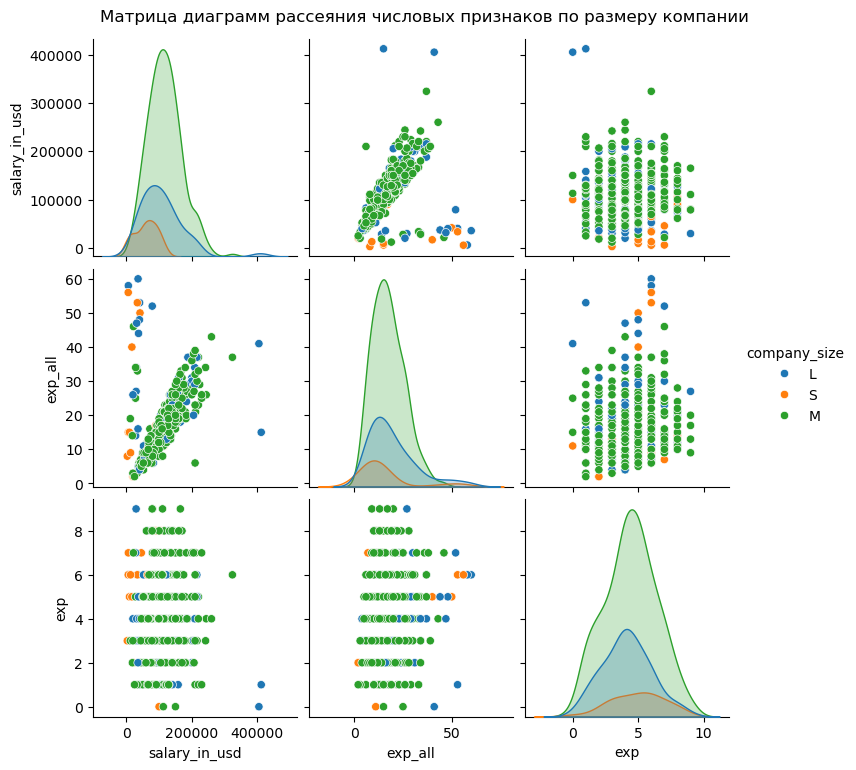

In [38]:
# Выбираем числовые признаки
num_cols = ["salary_in_usd", "exp_all", "exp"]

# Добавляем категориальный признак, по которому будем раскрашивать точки
sns.pairplot(df[num_cols + ["company_size"]], hue="company_size")

plt.suptitle("Матрица диаграмм рассеяния числовых признаков по размеру компании", y=1.02)
plt.show()


---

На диаграммах рассеяния видно, как два признака связаны между собой. Например: график ```salary_in_usd``` и ```exp_all``` показывает, растёт ли зарплата с увеличением опыта. ```exp_all``` и ```exp``` показывает, как общий опыт соотносится с опытом на последней должности.

**Анализ графика**:\
Связь между зарплатой (```salary_in_usd```) и общим опытом (```exp_all```): видна положительная зависимость — чем больше опыт, тем выше зарплата. Однако точки не образуют идеальную линию, значит, влияние опыта есть, но оно не единственный фактор (ещё влияют должность, тип занятости, регион и т.д.). Компании среднего размера (M) чаще встречаются при высоких зарплатах, чем малые (S).

Связь между общим опытом (```exp_all```) и опытом на последнем месте (```exp```): здесь также видна положительная зависимость — логично, что у людей с большим общим опытом больше и опыт на последнем месте. Однако точки группируются слоями, что может означать, что ```exp``` хранится в целых числах (например, 1, 2, 3 года).

Распределение зарплаты (```salary_in_usd```): гистограмма ```salary_in_usd``` показывает, что большинство зарплат сосредоточено в пределах до 200 000 USD, а редкие значения доходят до 400 000 USD. Средние компании (M) доминируют в этих высоких значениях, малые (S) — внизу.

Влияние категории ```company_size``` — цвета показывают, как зарплата и опыт распределяются по размеру компании: средние компании (M) — большинство точек, они дают больше разброс зарплат, особенно на высоких значениях опыта; крупные компании (L) — реже встречаются, но обычно дают высокие зарплаты при среднем или большом опыте; малые компании (S) — чаще платят меньше, даже при большом опыте.

**Вывод:**\
Зависимость между опытом и зарплатой есть: чем выше ```exp_all```, тем больше ```salary_in_usd```;\
Размер компании влияет на уровень зарплаты: крупные и средние компании платят больше;\
Опыт на последнем месте работы (```exp```) слабее связан с зарплатой, чем общий опыт (```exp_all```);\
Общая закономерность: больше опыта - выше зарплата, особенно в крупных и средних компаниях.

---

## 6. Гистограммы

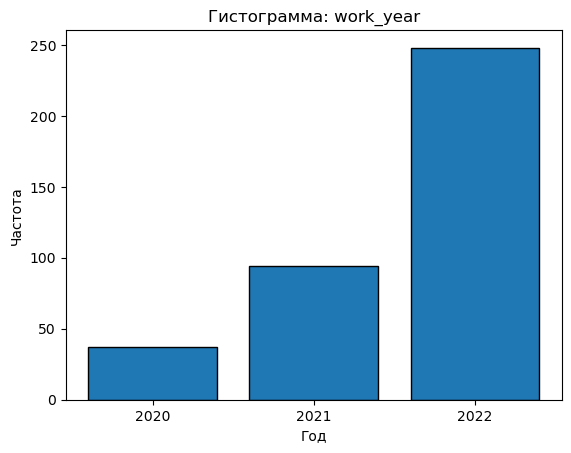

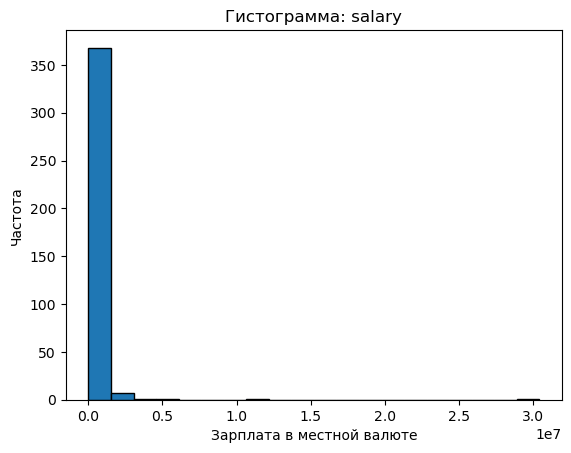

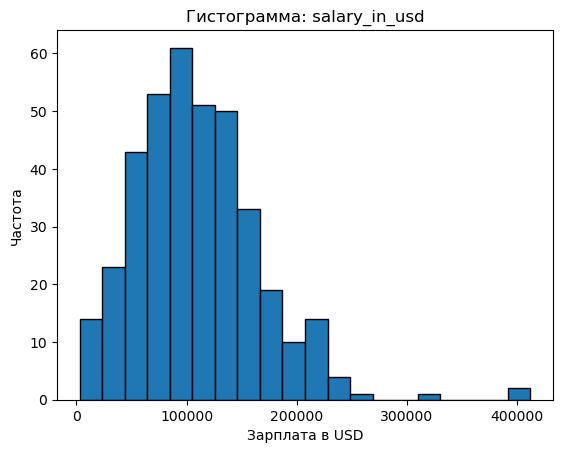

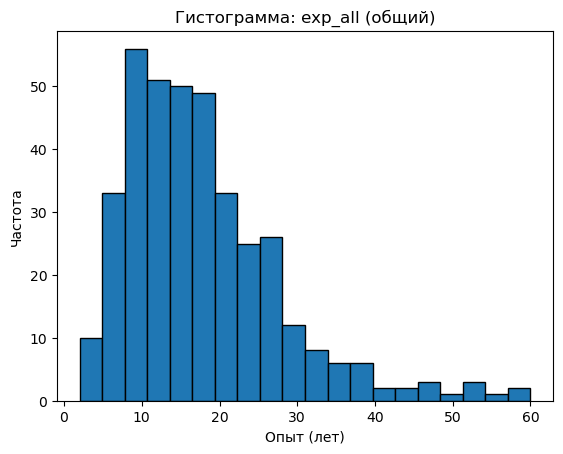

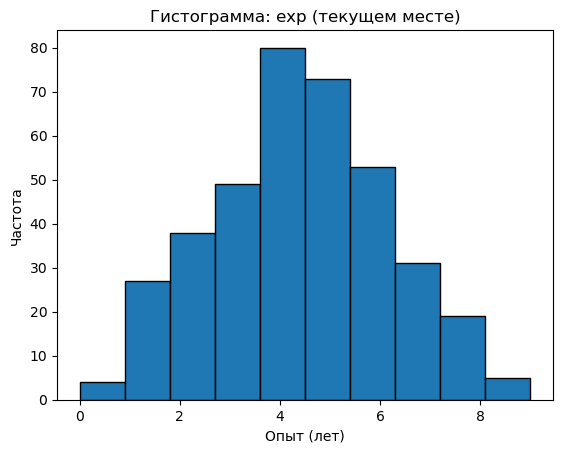

In [39]:
import matplotlib.pyplot as plt

counts = df["work_year"].value_counts().sort_index()
plt.bar(counts.index, counts.values, edgecolor="black")
plt.title("Гистограмма: work_year")
plt.xlabel("Год")
plt.ylabel("Частота")
plt.xticks([2020, 2021, 2022])
plt.show()

plt.hist(df["salary"], bins=20, edgecolor="black")
plt.title("Гистограмма: salary")
plt.xlabel("Зарплата в местной валюте")
plt.ylabel("Частота")
plt.show()


plt.hist(df["salary_in_usd"], bins=20, edgecolor="black")
plt.title("Гистограмма: salary_in_usd")
plt.xlabel("Зарплата в USD")
plt.ylabel("Частота")
plt.show()

plt.hist(df["exp_all"], bins=20, edgecolor="black")
plt.title("Гистограмма: exp_all (общий)")
plt.xlabel("Опыт (лет)")
plt.ylabel("Частота")
plt.show()

plt.hist(df["exp"], bins=10, edgecolor="black")
plt.title("Гистограмма: exp (текущем месте)")
plt.xlabel("Опыт (лет)")
plt.ylabel("Частота")
plt.show()

---

**Анализ гистограмм:**\
```work_year``` — год выплаты зарплаты:\
Гистограмма показывает, что данные собраны за 3 года — 2020, 2021 и 2022.\
Видно, что:\
В 2020 году данных мало (около 40 записей);\
В 2021 году их становится больше (примерно 100 записей);\
В 2022 году — значительно больше (около 250 записей).\
Вывод: с каждым годом количество наблюдений растёт — вероятно, это связано с расширением выборки или увеличением популярности профессий в сфере анализа данных.

```salary``` — зарплата в местной валюте:\
Распределение очень неравномерное, большинство зарплат сосредоточено у нижних значений (левый пик);\
Есть несколько аномально больших значений — вероятно, это выбросы (до 30 млн).\
Вывод: данные о зарплатах в местных валютах сильно искажены курсом, поэтому анализировать их лучше в долларах (см. следующий график).

```salary_in_usd``` — зарплата в долларах:\
Распределение сдвинуто вправо (асимметричное):\
большинство зарплат — в диапазоне от 50 000 до 150 000 USD,\
есть немного высоких зарплат (до 400 000 USD).\
Вывод: это типичная ситуация — у небольшой части специалистов зарплаты заметно выше среднего, что создаёт «длинный хвост» вправо.

```exp_all``` — общий опыт работы:\
Большинство работников имеет от 5 до 20 лет опыта, пик — около 10–15 лет;\
Есть небольшое количество сотрудников с опытом больше 40 лет, что выглядит редкостью, но возможным явлением.\
Вывод: распределение смещено вправо — типичный профессиональный стаж специалистов в данных профессиях — 10–15 лет.

```exp``` — опыт на текущем месте:\
График напоминает нормальное распределение с центром около 4–5 лет;\
Большинство работников находится в компании не дольше 5–6 лет;\
Вывод: специалисты относительно часто меняют работу, средний срок работы на одном месте — около 4 лет.

**Выводы:**\
Данные охватывают 2020–2022 гг., с ростом числа записей;\
Зарплаты в USD выглядят реалистично и подходят для анализа, в отличие от зарплат» в местных валютах;\
Опыт распределён логично: у большинства 10–15 лет общего стажа и 4–5 лет на текущем месте.

---

## 7. Кореляция и ковариация

---

**Разница Корреляции и Ковариации:**
- Ковариация - мера, используемая для указания степени изменения двух случайных переменных в тандеме (значение ковариации зависит от единиц измерения (например, зарплата в долларах и опыт в годах), поэтому тяжело сравнивать разные пары переменных).
- Корреляция - мера, используемая для представления, насколько сильно связаны две случайные величины (нормализованная ковариация, она показывает силу и направление связи между переменными в диапазоне от –1 до +1: +1 — идеальная прямая зависимость; –1 — идеальная обратная зависимость; 0 — связи нет. Корреляция не зависит от единиц измерения (всё приводится к одному масштабу)).

---

Матрица ковариации:
                    work_year  salary_in_usd        salary       exp_all  \
work_year           0.443202   1.138250e+04 -1.234068e+05  3.131326e-01   
salary_in_usd   11382.503867   3.212711e+09 -1.054547e+10  2.433575e+05   
salary        -123406.841919  -1.054547e+10  2.950110e+12  5.979292e+06   
exp_all             0.313133   2.433575e+05  5.979292e+06  1.007153e+02   
exp                 0.028926  -4.700632e+03  1.439005e+05  1.635472e+00   

                         exp  
work_year           0.028926  
salary_in_usd   -4700.631940  
salary         143900.531432  
exp_all             1.635472  
exp                 3.811744   

Матрица корреляции:
                work_year  salary_in_usd    salary   exp_all       exp
work_year       1.000000       0.301648 -0.107924  0.046868  0.022255
salary_in_usd   0.301648       1.000000 -0.108321  0.427820 -0.042477
salary         -0.107924      -0.108321  1.000000  0.346883  0.042912
exp_all         0.046868       0.427820

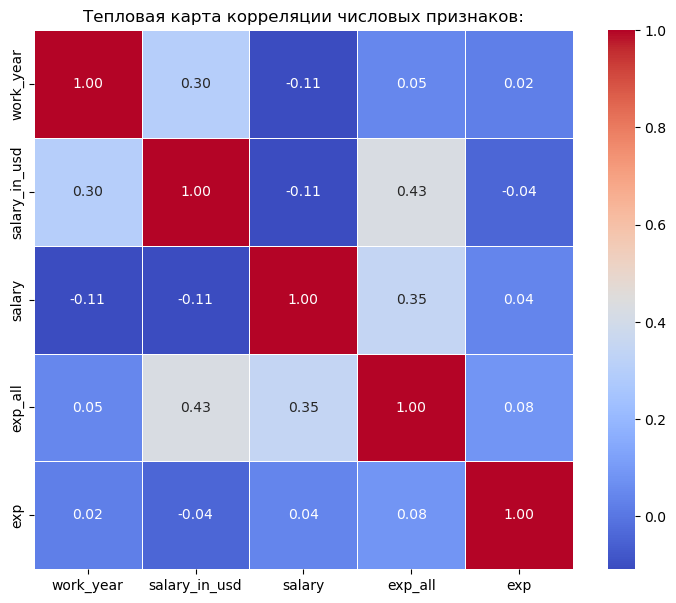

In [40]:
# выбор числовых признаков
num_cols = ["work_year", "salary_in_usd", "salary", "exp_all", "exp"]

# рассчёт ковариации
cov_matrix = df[num_cols].cov()
print("Матрица ковариации:\n", cov_matrix, "\n")

# рассчёт корреляции
corr_matrix = df[num_cols].corr()
print("Матрица корреляции:\n", corr_matrix, "\n")

# Построение heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,          # показываем значения на клетках
    cmap="coolwarm",     # цветовая схема
    fmt=".2f",           # 2 знака после запятой
    linewidths=0.5,      # разделительные линии между ячейками
    square=True          # делаем клетки квадратными для симметрии
)
plt.title("Тепловая карта корреляции числовых признаков:", fontsize=12)
plt.show()

---

**Анализ корреляции:**\
```work_year — salary_in_usd``` — 0.30 — небольшая положительная корреляция — с каждым годом в среднем зарплаты немного растут;\
```salary_in_usd — exp_all``` — 0.43 — умеренная положительная зависимость — чем больше общий опыт, тем выше зарплата;\
```salary — exp_all``` — 0.35 — аналогично: общий опыт положительно влияет на зарплату (в местной валюте);\
```salary_in_usd — salary```	— –0.11	— очень слабая отрицательная корреляция — скорее всего, эффект разницы валют и стран;\
```work_year — exp_all / exp```	— около 0.02–0.04 — связь почти отсутствует: опыт работников не сильно меняется по годам;\
```exp_all — exp```	— 0.08 — очень слабая положительная корреляция — текущий опыт слабо связан с общим.

**Анализ корреляции:**\
```work_year – salary_in_usd``` — 11382.5 — слабая прямая зависимость — зарплаты немного растут с годом;\
```salary_in_usd – exp_all``` —	243357.5 — заметная прямая зависимость — чем больше опыт, тем выше зарплата;\
```salary_in_usd – salary``` — -1.05e+10 — слабая обратная зависимость, объясняется валютами разных стран;\
```exp_all – exp``` — 1.63 — слабая прямая зависимость между общим и текущим опытом;\
остальные значения (около 0) — связи почти нет.

**Выводы:**\
Ковариация: признаки в целом меняются в схожем направлении, но из-за разных масштабов интерпретация менее наглядна, чем у корреляции. Поэтому ковариацию обычно используют для предварительной оценки направления взаимосвязи, а уже корреляцию — для оценки силы этой связи.

Анализ ковариации и корреляции показал наличие слабой положительной зависимости между годом и уровнем зарплаты, что отражает постепенный рост доходов со временем. Умеренная корреляция между зарплатой и общим опытом работы указывает на то, что более опытные сотрудники получают более высокие зарплаты. Между другими признаками (например, опытом на текущем месте и зарплатой) линейная зависимость практически отсутствует. В целом, наиболее выраженная взаимосвязь наблюдается между уровнем зарплаты и общим стажем работы.

**Heatmap:**\
Тепловая карта обычно строится по матрице корреляции, а не ковариации, потому что:
- корреляция нормализована (в диапазоне от -1 до 1),
- легко увидеть визуально, где сильная зависимость (яркие цвета).

На heatmap видно:
- тёплые/красные тона — сильная положительная связь,
- холодные/синие тона — сильная отрицательная связь,
- бледные/светлые тона — слабая или отсутствующая связь.

**Выводы:**\
По корреляционной тепловой карте видно:
- ```salary_in_usd и exp_all``` — умеренно положительная корреляция (~0.43) — чем больше общий стаж, тем выше зарплата.
- ```salary и exp_all``` — тоже положительная (~0.35), но слабее.
- ```work_year и salary_in_usd``` — слабая положительная связь (~0.30) — в более поздние годы зарплаты немного выше.
- ```salary и salary_in_usd``` — слабая отрицательная связь (–0.1), что говорит о разнице валют или стран.
- ```exp и exp_all / salary_in_usd``` — почти нулевая корреляция, значит, текущий опыт не влияет на зарплату.

То есть используя тепловую карту кореляции, так же можно сделать выводы, описанные выше.

---

## 9. Выполнение индивидуальных заданий

### Задание 1
Использовать seaborn. По группировке - ```work_year``` и количество компаний по различному типу занятости ```employment_type``` построить диаграмму.

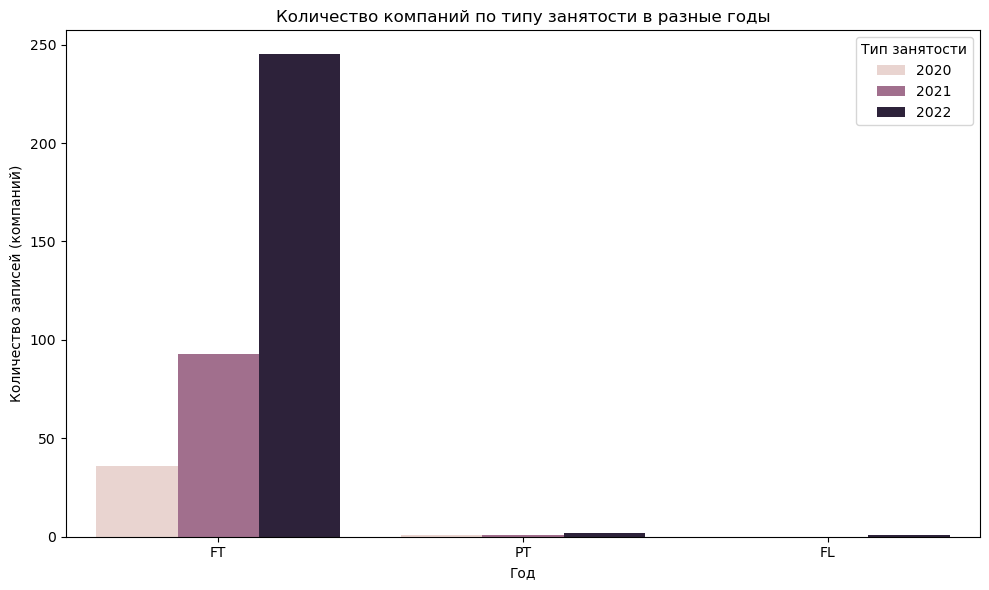

In [41]:
# создание столбчатой диаграммы:
# x – тип занятости (FT, PT, FL),
# hue – добавляет разделение по годам (2020, 2021, 2022) с разными цветами
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="employment_type", hue="work_year")

plt.title("Количество компаний по типу занятости в разные годы")
plt.xlabel("Год")
plt.ylabel("Количество записей (компаний)")
plt.legend(title="Тип занятости")
plt.tight_layout()
plt.show()

---

**Анализ диаграммы:**
1. Тип занятости ```FT``` (полная занятость) — явно доминирует. Почти все записи относятся именно к полному рабочему дню. Это логично — большинство компаний нанимают сотрудников на полную ставку.
2. Типы ```PT``` (частичная занятость) и ```FL``` (фриланс) встречаются крайне редко — на графике почти незаметны. Это говорит о том, что данные в основном представляют рынок постоянной занятости.
3. Рост количества записей от 2020 к 2022 году. Можно заметить, что: в 2020 году данных меньше всего (наименьшие столбцы). В 2021 году — больше. В 2022 году — максимальное количество записей. Это может быть связано с тем, что рынок труда активно развивался или просто больше данных было собрано за последние годы.

**Выводы:**\
Основная масса сотрудников работает на полной занятости. В 2022 году наблюдается наибольшее количество занятых, особенно по типу ```FT```. Доля фриланса и частичной занятости незначительна, что указывает на низкую распространённость таких форм работы в рассматриваемом наборе данных.

---

### Задание 2
Использовать ```pandas``` и ```plot```. По сводной таблице ```pivot_table``` - отобразить среднюю зарплату в usd по локациям ```company_location```. Сделать линию зелёной, шириной 4 и отобразить маркеры в виде *.


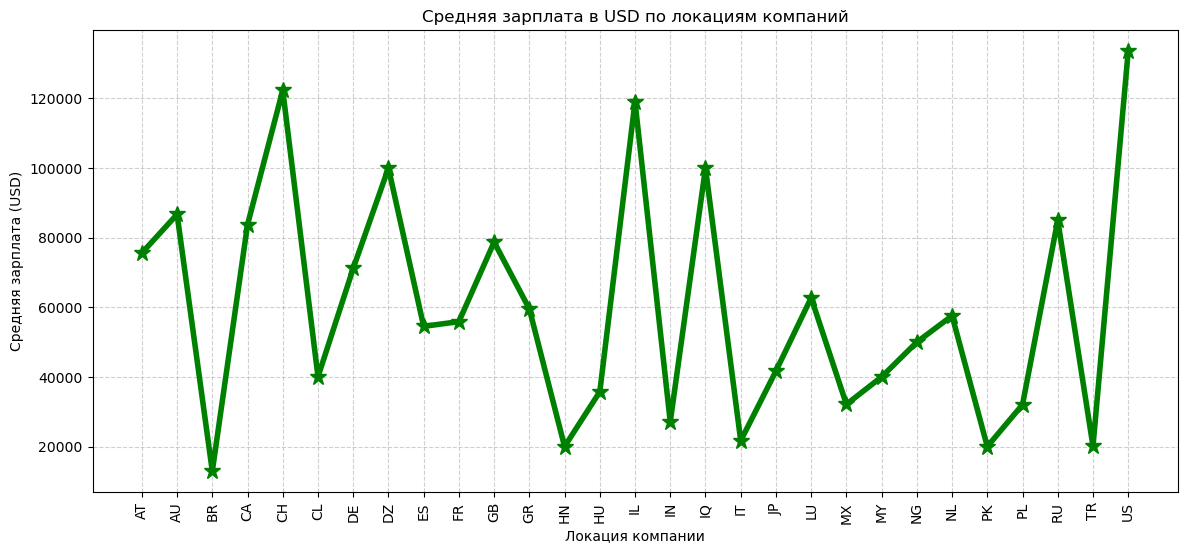

In [43]:
# создание сводной таблицы (pivot_table), где для каждой локации компании ('company_location') вычисляется средняя зарплата в долларах США ('salary_in_usd')
pivot = df.pivot_table(
    values="salary_in_usd",      # столбец, по которому вычисляется среднее значение
    index="company_location",    # группировка по локации компании
    aggfunc="mean"               # функция агрегации — среднее значение
)

# построение линейного графика на основе сводной таблицы
ax = pivot.plot(
    kind="line",         # тип графика — линейный
    color="green",       # цвет линии — зелёный
    linewidth=4,         # толщина линии — 4
    marker="*",          # маркеры точек на линии — звёздочки
    markersize=12,       # размер маркеров
    legend=False,        # отключаем легенду (она не нужна, так как график один)
    figsize=(14,6)       # размер графика (ширина, высота)
)

plt.title("Средняя зарплата в USD по локациям компаний")
plt.xlabel("Локация компании")
plt.ylabel("Средняя зарплата (USD)")

# Настройка подписей на оси X — вывод названия локацийи, поворот их на 90 градусов для лучшей читаемости
plt.xticks(
    ticks=range(len(pivot.index)),  # позиции меток
    labels=pivot.index,             # названия локаций
    rotation=90                     # поворот подписей
)

# добавление сетки для удобства восприятия значений
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


---

**Анализ графика:**
1. Сильные колебания между странами: значения заметно различаются, что говорит о больших различиях в уровне оплаты труда в зависимости от локации компании.
2. Наиболее высокие средние зарплаты наблюдаются в: США ```US``` — самая высокая средняя зарплата среди всех локаций; Швейцарии ```CH``` и Израиле ```IL``` — также заметно выше среднего уровня. Эти страны традиционно характеризуются высокими доходами в IT и связанных сферах.
3. Средний уровень зарплат (от 60 000 до 80 000 USD) наблюдается в странах: Австралия ```AU```, Канада ```CA```, Германия ```DE```, Великобритания ```GB```, Испания ```ES```. Это развитые страны с устойчивым рынком труда.
4. Низкие значения зарплат (20 000–40 000 USD) характерны для: Бразилии ```BR```, Нигерии ```NG```, Польши ```PL```, Турции ```TR```, Мексики ```MX```. Это отражает более низкий уровень доходов и стоимости жизни в развивающихся экономиках.

**Выводы:**\
Средняя зарплата напрямую зависит от локации компании — страны с более развитой экономикой и высоким уровнем жизни (США, Швейцария, Израиль) предлагают значительно более высокие зарплаты.\
В развивающихся странах (Бразилия, Турция, Польша и др.) уровень зарплат существенно ниже.\
Таким образом, географический фактор является важным показателем, влияющим на размер оплаты труда.

---

### Задание 3 
Использовать matplotlib. Построить круговую диаграмму, которая отображает процент количества записей по каждому году.

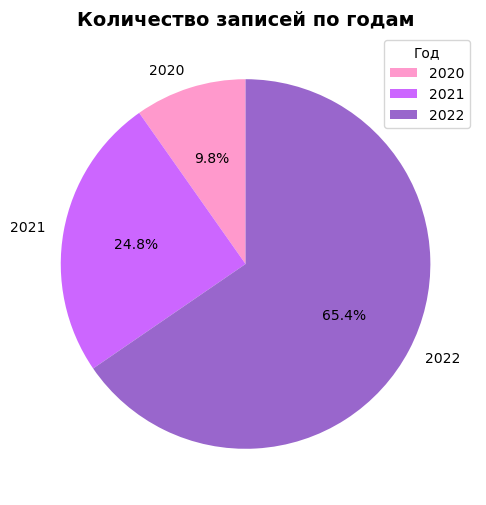

In [44]:
# подсчет количества записей (строк) для каждого года
# результат — серия, где индекс = год, значение = количество записей
year_counts = df["work_year"].value_counts().sort_index()

# создание фигуры (рисунка) размером 6x6 дюймов
plt.figure(figsize=(6, 6))

# построение круговой диаграммы 
plt.pie(
    year_counts,                  # данные (количество записей по годам)
    labels=year_counts.index,     # подписи сегментов (года)
    autopct="%1.1f%%",            # отображение процентов с 1 знаком после запятой
    startangle=90,                # поворот диаграммы, чтобы начиналась сверху
    colors=["#ff99cc", "#cc66ff", "#9966cc"]  # цвета 
)

plt.title("Количество записей по годам", fontsize=14, fontweight="bold")

plt.legend(title="Год", loc="best")

plt.show()

---

**Анализ диаграммы:**
1. 2022 год занимает наибольшую долю — около 65,4% всех записей. Это говорит о том, что большинство данных в наборе относятся к 2022 году, возможно, из-за расширения базы или роста активности в этот период.
2. 2021 год составляет 24,8% — заметно меньше, но по сравнению с 2020 годом наблюдается рост.
3. 2020 год имеет наименьшую долю — около 9,8%, что указывает на ограниченное количество данных за этот год.

**Вывод:**\
Данные имеют явное смещение в сторону последних лет. Это может означать: увеличение числа записей или участников в последние годы; расширение охвата исследования (например, больше компаний начали подавать данные); актуальность анализа в основном связана с последними тенденциями 2022 года. Таким образом, при интерпретации других графиков важно учитывать, что большая часть информации отражает состояние именно в 2022 году.

---

## Дополнительная практика 
### Задание 1
Выполните минимум один любой график типа ```hexagonal binning plot```. Сделайте выводы.


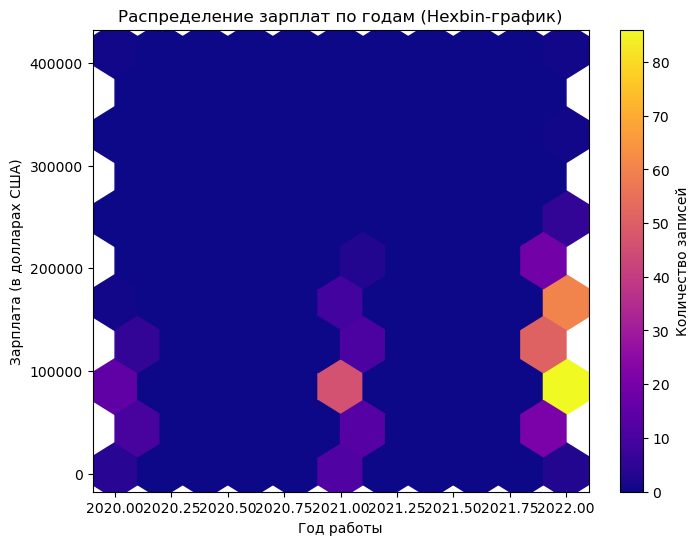

In [45]:
# зависимость между годом и зарплатой в долларах
plt.figure(figsize=(8, 6))

# hexbin — это "шестигранная диаграмма рассеяния", где точки сгруппированы в ячейки-шестиугольники
# 'gridsize' — определяет количество шестиугольников (чем больше, тем мельче)
# 'cmap' — цветовая схема
plt.hexbin(df["work_year"], df["salary_in_usd"], gridsize=10, cmap="plasma")

# добавление цветовой шкалы справа, показывающей количество точек в каждой ячейке
plt.colorbar(label="Количество записей")

plt.xlabel("Год работы")
plt.ylabel("Зарплата (в долларах США)")
plt.title("Распределение зарплат по годам (Hexbin-график)")

plt.show()

---

**Анализ графика:**
1. Ось X — "Год работы": отражает периоды 2020 – 2022 годов. Видно, что основная часть данных сосредоточена в 2022 году, чуть меньше — в 2021, и совсем немного — в 2020. Это говорит о том, что в выборке больше всего записей за последние годы (2022 г.).
2. Ось Y — "Зарплата (в долларах США)": большинство значений лежит в диапазоне до 150 000 USD. Есть единичные значения с зарплатами выше 200 000 USD, но они редкие (тёмные области или почти пустые шестиугольники).
3. Цветовая шкала: цвет показывает количество записей в каждом шестиугольнике. Чем светлее (жёлтый/оранжевый), тем больше записей в этом диапазоне зарплат и лет. Самые “горячие” области наблюдаются в 2022 году при зарплатах примерно от 50 000 до 100 000 USD.

**Выводы:**
2022 год является самым насыщенным по количеству записей — видимо, база активно пополнялась именно за этот период. Основная масса специалистов зарабатывает до 100 000 USD в год, что соответствует типичным рыночным значениям для большинства IT-позиций. Высокие зарплаты (200 000 USD+) встречаются редко, и чаще всего указываются только в последние годы, что может отражать рост зарплат или добавление новых, более высоких должностей. Hexbin-график оказался полезным, так как тут мы сразу видим концентрацию значений по цвету.

---

### Задание 2
Выполните минимум один график типа ```boxplot``` для любого столбца. Сделайте выводы.

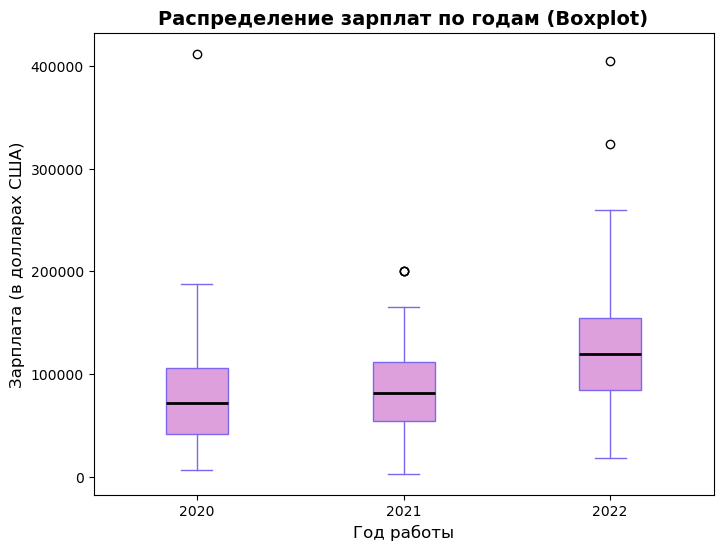

In [46]:
# построение boxplot (ящик с усами) для зарплат по годам
plt.figure(figsize=(8, 6))

# построение графика: по оси X — год работы, по оси Y — зарплата в долларах
plt.boxplot(
    [df[df["work_year"] == year]["salary_in_usd"] for year in sorted(df["work_year"].unique())],
    tick_labels=sorted(df["work_year"].unique()),
    patch_artist=True,        # закрашенные "ящики"
    boxprops=dict(facecolor="#dda0dd", color="#7b68ee"),  # цвет ящиков и границ
    medianprops=dict(color="black", linewidth=2),         # цвет линии медианы
    whiskerprops=dict(color="#7b68ee"),                   # цвет "усов"
    capprops=dict(color="#7b68ee")                        # цвет концов "усов"
)

plt.title("Распределение зарплат по годам (Boxplot)", fontsize=14, fontweight='bold')
plt.xlabel("Год работы", fontsize=12)
plt.ylabel("Зарплата (в долларах США)", fontsize=12)

plt.show()

---

**Анализ графика:**
1. Рост медианы: медианная (средняя по распределению) зарплата постепенно увеличивается от 2020 к 2022 году. Это говорит о положительной динамике доходов: специалисты стали зарабатывать больше.
2. Увеличение разброса данных: в 2022 году диапазон между минимальными и максимальными значениями заметно шире, чем в 2020–2021. Это указывает на расширение диапазона зарплат — в выборке появились как низкооплачиваемые, так и более высокооплачиваемые должности.
3. Выбросы: в каждом году наблюдаются единичные выбросы — экстремально высокие зарплаты (более 300 000–400 000 $). Это, скорее всего, топовые специалисты или руководители, получающие значительно больше среднего уровня.
4. Стабильность нижних значений: минимальные зарплаты остаются примерно на одном уровне, что показывает, что входной порог в профессию не изменился существенно.
   
**Выводы:**
В целом, зарплаты растут с каждым годом, особенно заметно в 2022 году. Распределение становится более разнообразным, что говорит о развитии рынка труда и появлении большего числа вакансий с разным уровнем оплаты. Наличие выбросов подтверждает, что в выборке есть индивидуумы с существенно более высокими доходами, что может быть связано с редкими навыками, опытом или руководящими должностями.

---

### Задание 3
Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).


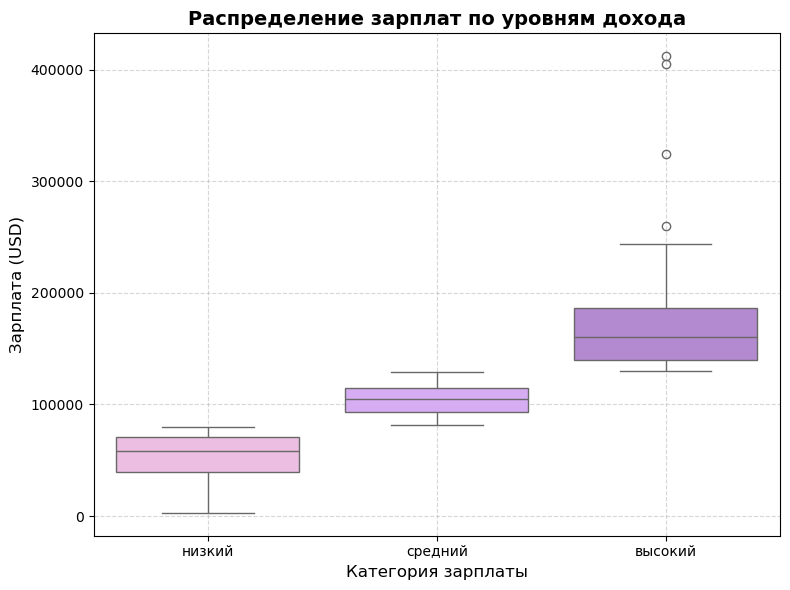

In [47]:
# создание категориального столбеца salary_level
# три категории зарплат: низкий, средний, высокий
df["salary_level"] = pd.qcut(
    df["salary_in_usd"],                     # на основе зарплаты в долларах
    q=3,                                     # делим на 3 равные группы (по количеству записей)
    labels=["низкий", "средний", "высокий"]  # подписи для категорий
)

plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x="salary_level",          # категории зарплат
    y="salary_in_usd",         # значение (зарплата)
    hue="salary_level",        # используем тот же столбец для цвета
    palette=["#f4b6e5", "#d8a1ff", "#b57edc"],  # розово-фиолетовая палитра
)

plt.title("Распределение зарплат по уровням дохода", fontsize=14, weight="bold")
plt.xlabel("Категория зарплаты", fontsize=12)
plt.ylabel("Зарплата (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Задание 4
Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

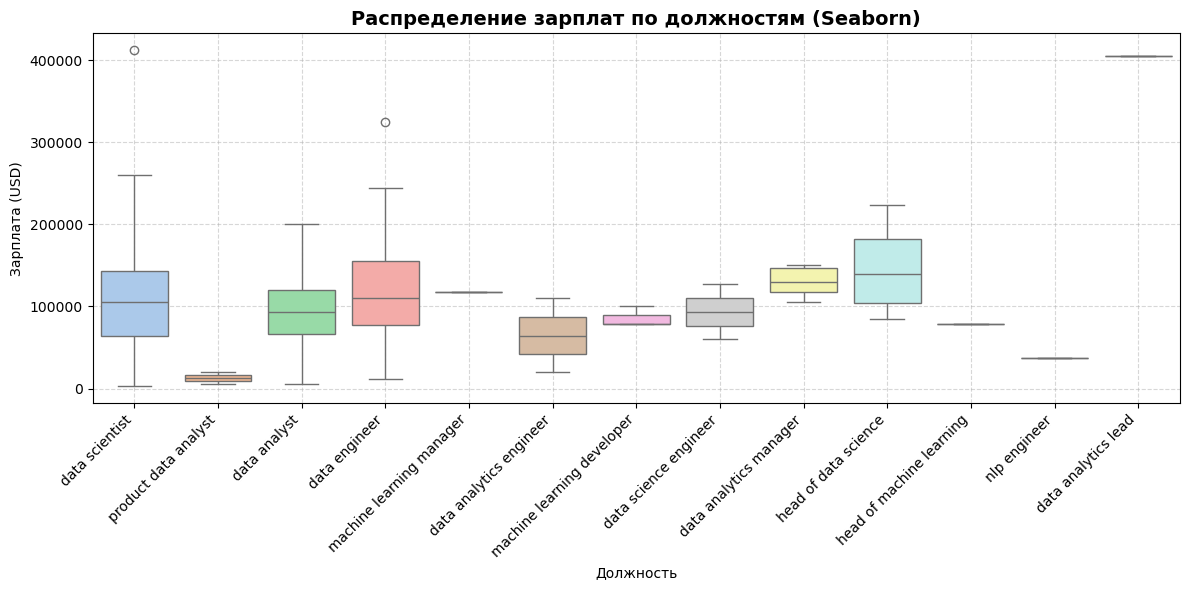

In [48]:
# зарплата по должностям (Seaborn)
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="job_title",          # категориальная переменная — должности
    y="salary_in_usd",      # числовая переменная — зарплата
    hue="job_title",        # используем ту же переменную для цвета
    palette="pastel",       # цветовая палитра
)

plt.title("Распределение зарплат по должностям (Seaborn)", fontsize=14, weight="bold")
plt.xlabel("Должность")
plt.ylabel("Зарплата (USD)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


---

Этот график показывает, как медианные значения и разброс зарплат отличаются между разными должностями. Можно заметить, какие позиции получают выше среднюю зарплату и где наблюдается большая вариация.

---

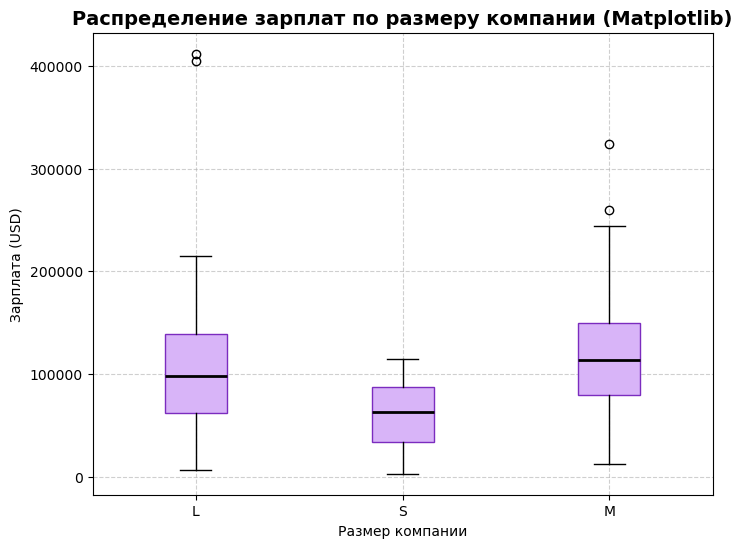

In [18]:
# зарплата по размеру компании (Matplotlib) 
# группировка данных по размерам компаний (S, M, L)
grouped_data = [df[df["company_size"] == size]["salary_in_usd"] for size in df["company_size"].unique()]

plt.figure(figsize=(8, 6))

plt.boxplot(
    grouped_data,
    tick_labels=df["company_size"].unique(),               
    patch_artist=True,                                    # разрешает закрашивать "ящики"
    boxprops=dict(facecolor="#d8b4f8", color="#7b2cbf"),  # цвет заливки и рамки коробок
    medianprops=dict(color="black", linewidth=2)          # настройка цвета медианы
)

plt.title("Распределение зарплат по размеру компании (Matplotlib)", fontsize=14, weight="bold")
plt.xlabel("Размер компании")
plt.ylabel("Зарплата (USD)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

---

Этот boxplot позволяет сравнить уровень зарплат в малых (S), средних (M) и крупных (L) компаниях. Можно заметить, где медиана выше и насколько сильно зарплаты варьируются в разных масштабах бизнесах.

---

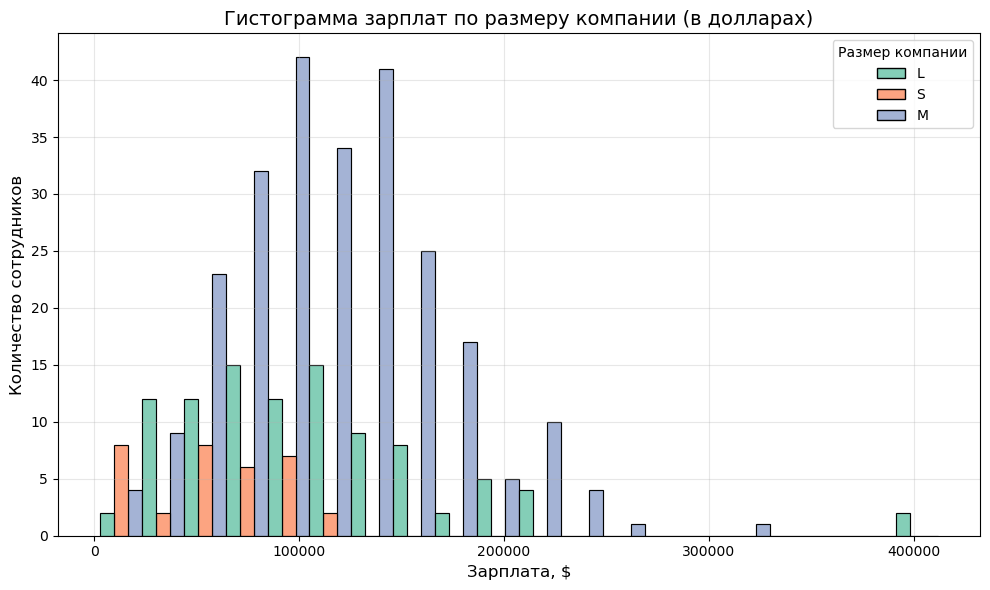

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x='salary_in_usd',     
    hue='company_size',
    multiple='dodge',
    palette='Set2',
    bins=20,
    edgecolor='black',
    alpha=0.8
)

plt.title('Гистограмма зарплат по размеру компании (в долларах)', fontsize=14)
plt.xlabel('Зарплата, $', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)

leg = ax.get_legend()
if leg:
    leg.set_title('Размер компании')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

**Анализ гистограммы:**
1. Основная часть сотрудников получает от 50 000 до 150 000 долларов - именно здесь сосредоточено большинство столбцов.
2. Распределение зарплат имеет правостороннюю асимметрию: чем выше зарплата, тем меньше сотрудников, её получающих.
3. Компании среднего размера представлены наиболее широко: у них больше всего сотрудников во всех диапазонах зарплат; распределение плавное и равномерное.
4. Компании большого размера имеют меньше сотрудников, но зарплаты распределены более разнообразно - встречаются как низкие, так и относительно высокие значения.
5. Малые компании - наименее многочисленные, и у них зарплаты, как правило, ниже, чем в средних и больших организациях.
6. Выбросы в области свыше 300 000-400 000 $ редки и могут соответствовать единичным высокооплачиваемым позициям (например, топ-менеджменту или ИТ-специалистам высокого уровня).

**Вывод:**
анализ распределения зарплат в долларах по размеру компании показывает, что большинство сотрудников зарабатывают от 50 до 150 тысяч долларов в год. Распределение имеет ярко выраженную правостороннюю асимметрию - доля сотрудников с высокими зарплатами значительно меньше. Наибольшее количество сотрудников работает в компаниях среднего размера, где также наблюдается наиболее широкое распределение заработных плат. В малых и больших компаниях доля сотрудников меньше, при этом в малых компаниях зарплаты преимущественно ниже среднего уровня. Таким образом, компании среднего размера демонстрируют наибольшее разнообразие и охват по уровню оплаты труда.

---

## Вывод

В ходе выполнения лабораторной работы была проведена аналитическая обработка и визуализация данных, характеризующих заработные платы сотрудников в зависимости от различных факторов, включая размер компании. Целью исследования являлось выявление закономерностей распределения заработных плат и оценка влияния категориальных признаков на уровень доходов.

В процессе анализа с помощью библиотек pandas, seaborn и matplotlib были выполнены этапы предварительной подготовки данных, вычислены описательные статистики, а также построены различные виды графиков: диаграммы рассеяния и гистограммы. Проведённый статистический анализ показал, что заработные платы имеют правостороннее (асимметричное) распределение: большинство сотрудников получают сравнительно невысокие зарплаты, а отдельные наблюдения с очень высокими значениями формируют «длинный хвост» распределения. После удаления выбросов и перехода к отображению данных в долларах США основная часть зарплат находится в диапазоне от 50 000 до 150 000 $.

Сравнительный анализ по категориям размеров компаний показал, что:
1. Компании среднего размера обладают наибольшей численностью сотрудников и наиболее широким диапазоном заработных плат;
2. Малые компании характеризуются меньшим количеством сотрудников и более низким уровнем доходов;
3. Крупные компании имеют разнообразие зарплат, но общая численность персонала у них меньше, чем у компаний среднего размера.

Таким образом, можно заключить, что компании среднего размера демонстрируют наиболее сбалансированное распределение заработных плат и выступают ключевым сегментом рынка труда. Полученные результаты отражают общие тенденции в области экономики труда и могут быть использованы для решения практических задач HR-аналитики, оценки уровня заработных плат, планирования кадровой политики и моделирования рыночных факторов оплаты труда.